Victor CHAU & Tahar AMAIRI
# IFT 870 - Forage de données
## TP4 : Fonctions descriptives

### Sommaire
- 1. Segmentation des données suivant la longueur des séquences
    - a) Histogramme
    - b) Partitionnement
- 2. Partitionnement à partir d’une représentation vectorielle des données
    - a) Représentation vectorielle
    - b) Suppression des motifs non-fréquents
    - c) Choix du nombre de clusters pour chaque groupe
- 3. Partitionnement à partir d’une matrice de distances
    - a) Construction de la matrice de distance
    - b) K-Medoids
    - c) Choix du nombre de clusters pour chaque groupe
- 4. Analyse de la signification sémantique
    - a) K-Means
    - b) K-Medoids
    - c) Comparaison entre les deux méthodes
     
## Importation des données

In [22]:
# import libs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from Bio import pairwise2
import pandas as pd
import numpy as np

In [3]:
# read CSV
df = pd.read_csv('TP4_data.csv')

# print the df
df.head()

,id,sequence
0,AAIY01303410.1/717-923,CCAACGUGGAUACUCCCGGGAGGUCACUCUCCCCGGGCUCUGUCCA...
1,CP000140.1/4143906-4143709,UACCUUUGCAUCCGAAUUGGUUCCGUACGCUCGUUCGGGCAUACGG...
2,URS0000D6BCE7_12908/1-215,GCGUAACGCGCUAUGGCUUAAACGGCUGCCCCAAAGCUGCCAAAGG...
3,X71081.1/4425-4646,CCAAUGUGGAUAUCCUUAGAGGUCUCUCUUGGGCUCUGUCCAGGUG...
4,AACY020770731.1/455-512,UUUCGUUCACCCUCAAUUGAGGGCGCAGUUCGAGUCAUACCAUGGA...


## 1. Segmentation des données suivant la longueur des séquences
### a) Histogramme

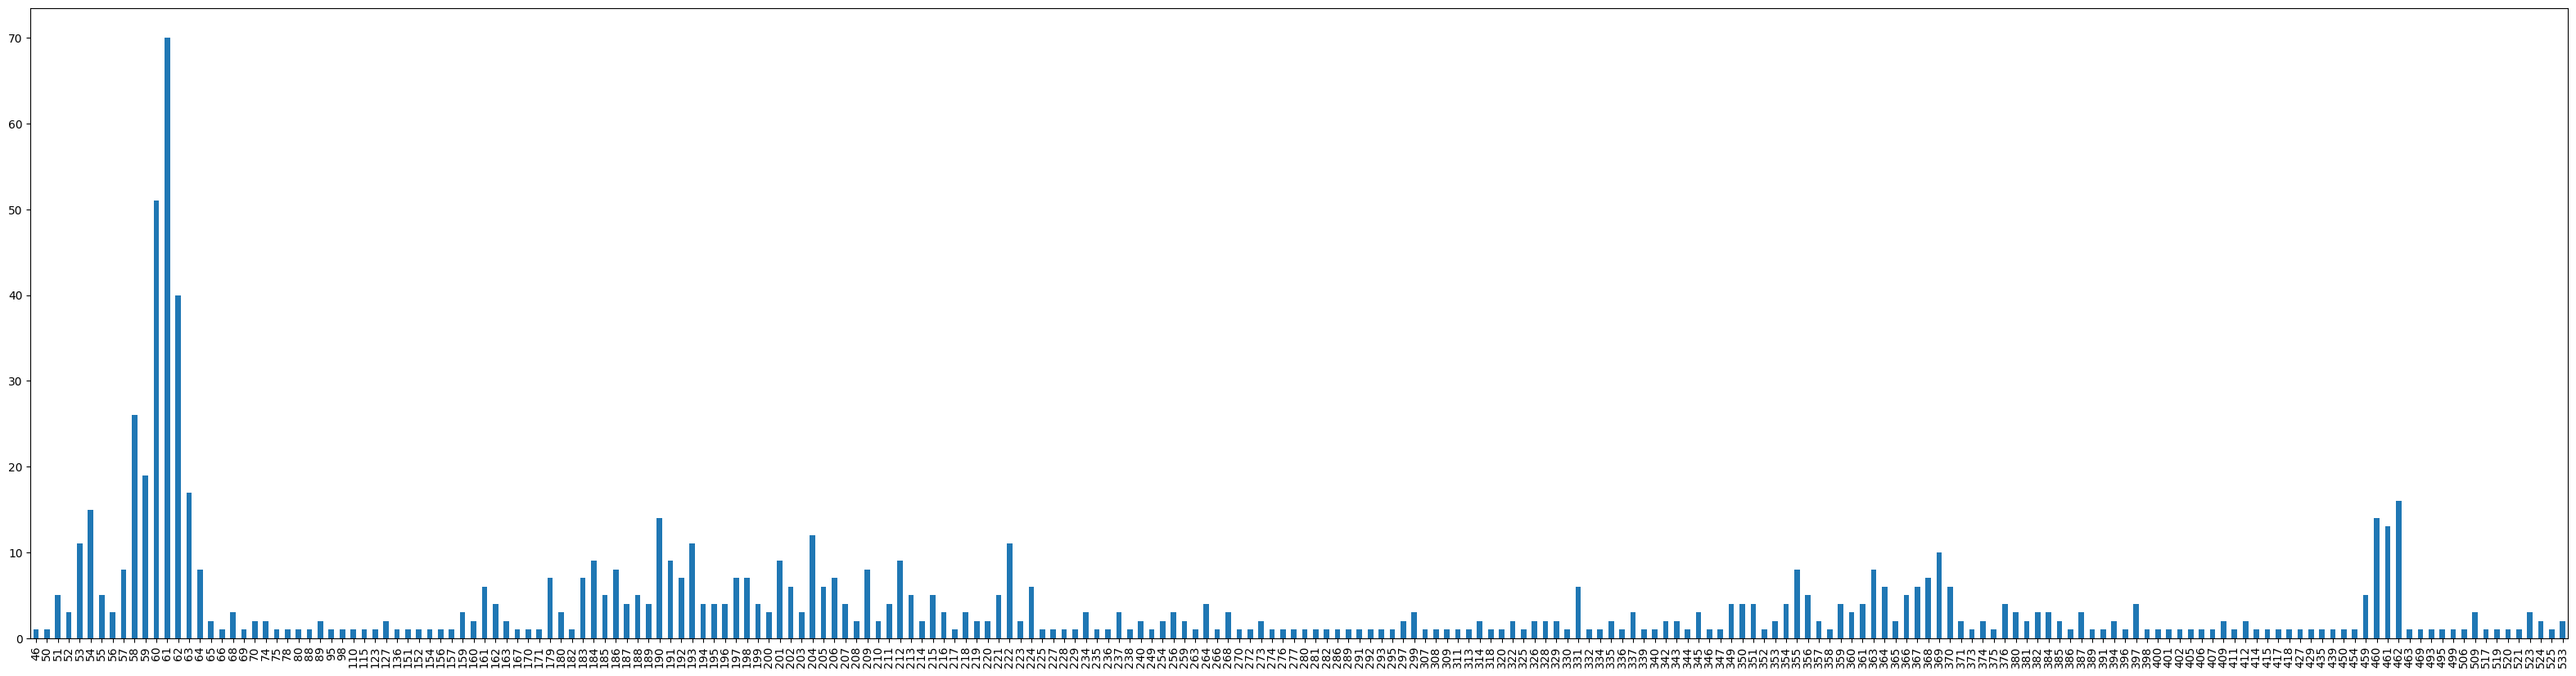

In [8]:
# plot histogram
freq = df['sequence'].str.len().value_counts()
freq = freq.loc[np.sort(freq.index)]
freq.plot(kind='bar', figsize=(40,10));

### b) Partitionnement 
COMMENT : TODO

In [9]:
# first group
mask = (df['sequence'].str.len() < 124)
df1 = df.loc[mask,:]

# second group
mask = (df['sequence'].str.len() >= 127) & (df['sequence'].str.len() < 300)
df2 = df.loc[mask,:]

# third group
mask = (df['sequence'].str.len() >= 300) & (df['sequence'].str.len() < 410)
df3 = df.loc[mask,:]

# fourth group
mask = (df['sequence'].str.len() >= 410)
df4 = df.loc[mask,:]

## 2. Partitionnement à partir d’une représentation vectorielle des données
### a) Représentation vectorielle

In [10]:
# transform a list of sequences into a k-mer vectorial representation using a list of k-mer
def SeqToKMerVec(seq, k_mer):
    # data frame containing the results
    df = pd.DataFrame(0, index=np.arange(len(seq)), columns=["{}-mer".format(k) for k in k_mer])

    # iterate over each k-mer value 
    for k in k_mer:
        # transform into a k-mer vectorial representation
        df['{}-mer'.format(k)] = seq.apply(lambda s: [s[i:i+k] for i in range(len(s)-k+1)]).values

    # return the df
    return df

# first group
dfKMerVec1 = SeqToKMerVec(df1['sequence'], [2,3,4])

# print the result
dfKMerVec1.head()

,2-mer,3-mer,4-mer
0,"[UU, UU, UC, CG, GU, UU, UC, CA, AC, CC, CC, C...","[UUU, UUC, UCG, CGU, GUU, UUC, UCA, CAC, ACC, ...","[UUUC, UUCG, UCGU, CGUU, GUUC, UUCA, UCAC, CAC..."
1,"[AU, UU, UC, CG, GU, UU, UC, CA, AC, CC, CC, C...","[AUU, UUC, UCG, CGU, GUU, UUC, UCA, CAC, ACC, ...","[AUUC, UUCG, UCGU, CGUU, GUUC, UUCA, UCAC, CAC..."
2,"[AA, AU, UC, CG, GA, AG, GA, AG, GG, GA, AA, A...","[AAU, AUC, UCG, CGA, GAG, AGA, GAG, AGG, GGA, ...","[AAUC, AUCG, UCGA, CGAG, GAGA, AGAG, GAGG, AGG..."
3,"[CC, CC, CU, UU, UG, GA, AG, GU, UA, AG, GA, A...","[CCC, CCU, CUU, UUG, UGA, GAG, AGU, GUA, UAG, ...","[CCCU, CCUU, CUUG, UUGA, UGAG, GAGU, AGUA, GUA..."
4,"[UU, UA, AA, AA, AC, CG, GA, AG, GG, GA, AU, U...","[UUA, UAA, AAA, AAC, ACG, CGA, GAG, AGG, GGA, ...","[UUAA, UAAA, AAAC, AACG, ACGA, CGAG, GAGG, AGG..."


In [11]:
# do the same for the other groups
dfKMerVec2 = SeqToKMerVec(df2['sequence'], [2,3,4])
dfKMerVec3 = SeqToKMerVec(df3['sequence'], [2,3,4])
dfKMerVec4 = SeqToKMerVec(df4['sequence'], [2,3,4])

### b) Suppression des motifs non-fréquents
COMMENT : TODO

In [12]:
# TODO

### c) Choix du nombre de clusters pour chaque groupe

In [37]:
# plot silhouette score, inspired from : https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
def plotSilhouetteScore(range_n_clusters, X, KMethod, KMethodParam, metric):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 1 columns
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(15, 5)

        # The silhouette coefficient can range from -1 to 1
        ax1.set_xlim([-1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # get labels from the specified KMethod
        cluster_labels = KMethod(n_clusters = n_clusters, **KMethodParam)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels, metric=metric)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels, metric=metric)
        y_lower = 10

        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-1, -0.8,-0.6,-0.4,-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle("Silhouette analysis with k = {} w\ a score of {}".format(n_clusters, silhouette_avg), fontweight="bold")
        plt.show()

In [52]:
# TODO

Pour l'analyse : https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d
## 3. Partitionnement à partir d’une matrice de distances
### a) Construction de la matrice de distance

In [14]:
# compute the alignement between two sequences
def dist(S1, S2):
    alignment = pairwise2.align.globalxx(S1,S2)
    return alignment[0][4] - alignment[0][2]

# get the matrix of distance of a list of sequences
def getDistMatrix(seq):
    # number of sequences
    n = len(seq)
    # data frame containing the results
    df = pd.DataFrame(0.0, index=np.arange(n), columns=np.arange(n))

    # iterate over each sequence
    for i in range(n):
        S1 = seq.values[i]
        for j in range(i,n):
            df.iloc[i,j] = df.iloc[j,i] = dist(S1,seq.values[j])
  
    # return the df
    return df

# first group
dfDist1 = getDistMatrix(df1['sequence'])

# print the result
dfDist1.head()

,0,1,2,3,4,5,6,7,8,9,...,295,296,297,298,299,300,301,302,303,304
0,0.0,11.0,59.0,54.0,50.0,46.0,46.0,35.0,54.0,50.0,...,47.0,47.0,50.0,50.0,52.0,47.0,56.0,54.0,2.0,50.0
1,11.0,0.0,56.0,51.0,47.0,45.0,43.0,34.0,51.0,47.0,...,46.0,44.0,45.0,45.0,49.0,48.0,55.0,55.0,13.0,45.0
2,59.0,56.0,0.0,55.0,25.0,49.0,53.0,54.0,31.0,47.0,...,60.0,44.0,45.0,45.0,57.0,48.0,67.0,17.0,59.0,45.0
3,54.0,51.0,55.0,0.0,54.0,50.0,46.0,55.0,56.0,46.0,...,55.0,47.0,48.0,48.0,30.0,47.0,44.0,50.0,54.0,48.0
4,50.0,47.0,25.0,54.0,0.0,42.0,52.0,45.0,36.0,44.0,...,55.0,41.0,44.0,44.0,56.0,47.0,64.0,20.0,50.0,44.0


In [15]:
# do the same for the other groups
dfDist2 = getDistMatrix(df2['sequence'])
dfDist3 = getDistMatrix(df3['sequence'])
dfDist4 = getDistMatrix(df4['sequence'])

### b) K-Medoids

In [126]:
# k-medoids clustering
def KMedoid(n_clusters, X):
    # number of sequences
    n = X.shape[0]
    # check if n_clusters is less or equal to the size of X
    n_clusters = n_clusters if n_clusters <= n else n
    # init n_clusters random medoids
    medoids, prevMedoids = np.random.choice(n, n_clusters, replace=False), np.zeros(n_clusters)
    # to consider ? : np.argpartition(np.sum(X, axis=1), n_clusters - 1)[:n_clusters]
    
    # loop until the medoids do not change
    while(not (medoids == prevMedoids).all()):
        # get the cluster idx for each sequences
        clusterIdx = np.argmin(X[:,medoids], axis=1)
        # cache medoids
        prevMedoids = medoids.copy()
        
        # update each medoids
        for k in range(n_clusters):
            # get sequences of the cluster k
            t = clusterIdx == k
            # get the indexes
            idx = t.nonzero()[0]
            # to store the distance mean of each sequences of the cluster k
            l = list()

            # compute the mean distance to other sequences in the cluster k
            for i in idx:
                l.append(X[i,t].mean())

            # update the medoid as the sequence having the minimum distance
            medoids[k] = idx[np.argmin(l)]

    # return clusters
    return clusterIdx

### c) Choix du nombre de clusters pour chaque groupe

In [127]:
# k values to test
range_n_clusters = range(2,3)

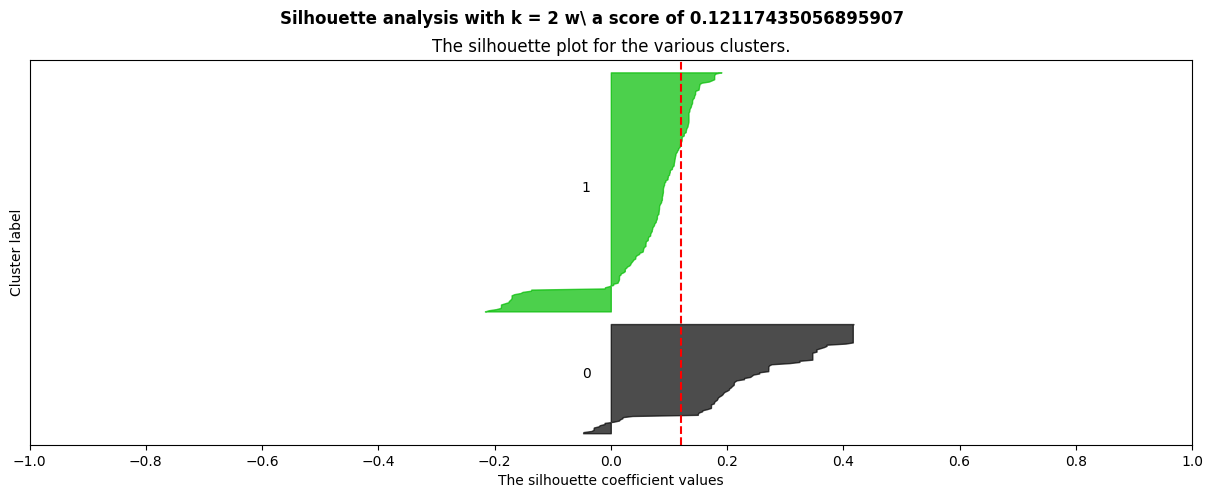

In [128]:
# first group
X = dfDist1.to_numpy()
param = {'X' : X}
plotSilhouetteScore(range_n_clusters, X, KMedoid, param, 'precomputed')

COMMENT : TODO

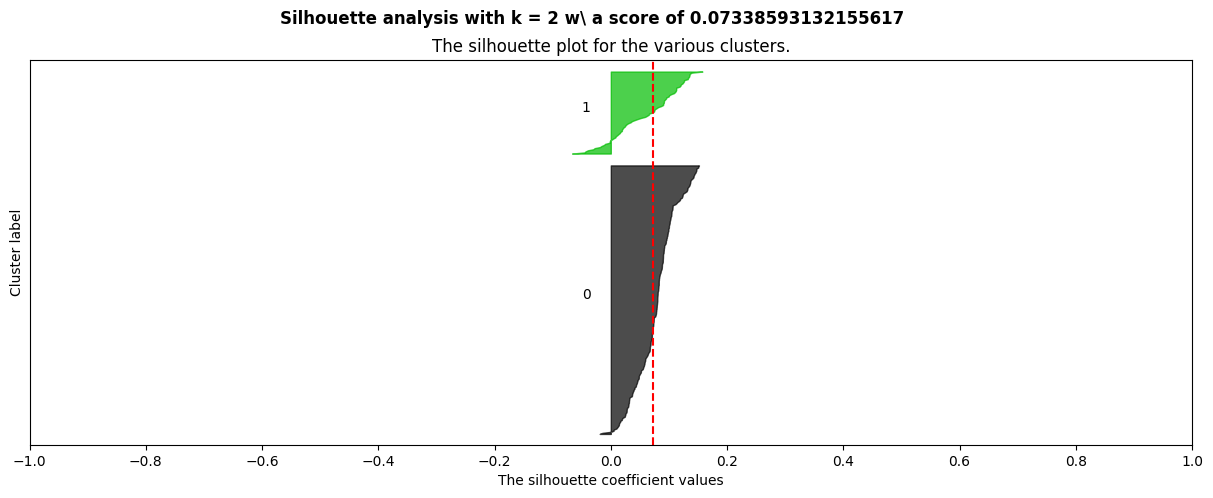

In [46]:
# second group
X = dfDist2.to_numpy()
param = {'X' : X}
plotSilhouetteScore(range_n_clusters, X, KMedoid, param, 'precomputed')

COMMENT : TODO

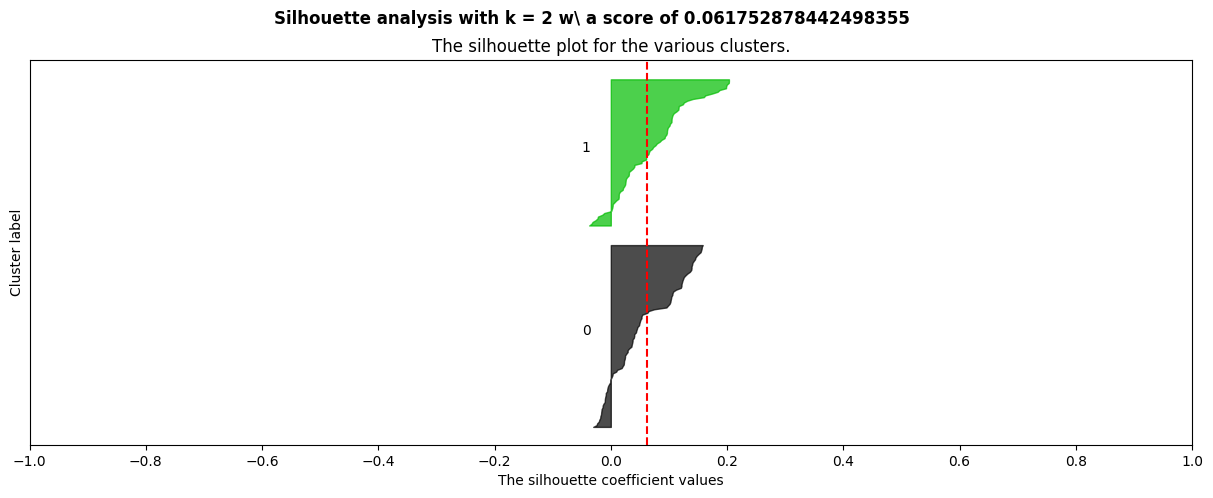

In [47]:
# third group
X = dfDist3.to_numpy()
param = {'X' : X}
plotSilhouetteScore(range_n_clusters, X, KMedoid, param, 'precomputed')

COMMENT : TODO

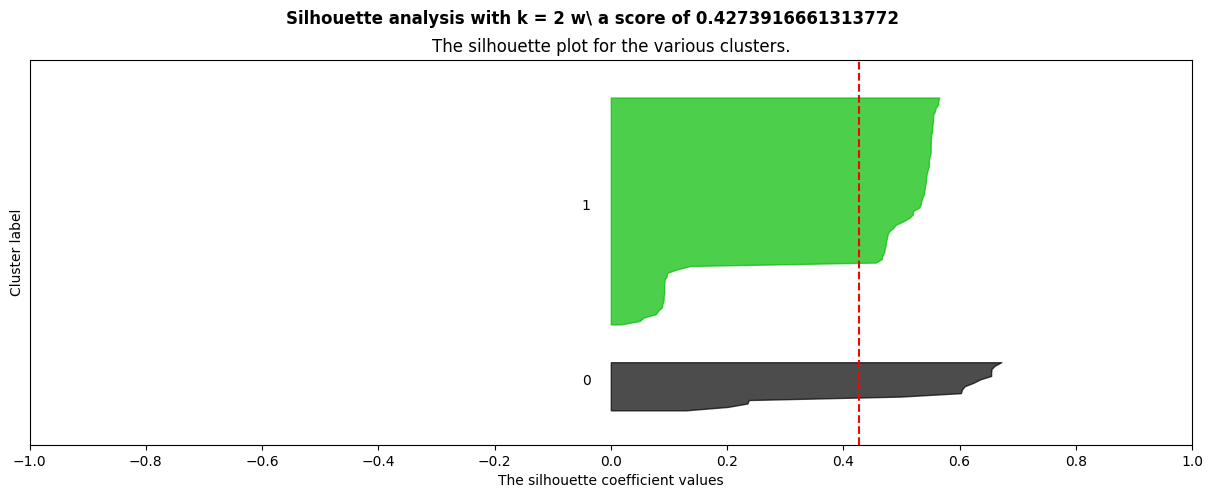

In [49]:
# forth group
X = dfDist4.to_numpy()
param = {'X' : X}
plotSilhouetteScore(range_n_clusters, X, KMedoid, param, 'precomputed')

COMMENT : TODO

## 4. Analyse de la signification sémantique
### a) K-Means

In [50]:
# TODO

COMMENT : TODO

### b) K-Medoids

In [51]:
# TODO

### c) Comparaison entre les deux méthodes
COMMENT : TODO